# Gold Comparison Capstone: Part 1 - Data Wrangling

For this capstone I have collected a total of five different csv files. They are:
1. "Barrick Gold Corp 1985-2020.csv"
2. "gold-price-last-ten-years.csv"
3. "BTC-USD 2014-2020.csv"
4. "silver history.csv"
5. "SP500 2007-2020.csv"

The purpose of this capstone is to conduct a small scale test of the hypothesis that when the stock market goes down in value (represented by the S&P500 index), the value of gold increases. To test this further, I have included several other sets of data: the value of silver, the stock value of Barrick Gold Corp (a gold mining company), and the value of Bitcoin to the US dollar. 

The reasoning for including silver is to see if this trend is unique to gold, or if other precious metals increase in value as the stock market declines. 

The stock value of Barrick Gold Corp. is included in order to see if the stock value of gold mining companies also increases in value in correlation to the value of gold and the S&P500 index. 

Finally, Bitcoin has been included simply because of its volatile nature in comparison to the rest of the values.

The final test for this data will be to construct a train/test pipeline that attempts to accurately predict the value of gold depending on the value of the other stocks and indexes provided. 

To begin, I will clean the data in order to properly merge and compare it in a single dataframe.

In [1]:
# To begin, I will import the "gold-price-last-ten-years.csv," and "SP500 2007-2020.csv" 
# in order to merge them together along the date column.

import pandas as pd # for importing, reading, cleaning csv files
import numpy as np # for maths, of course
import matplotlib.pyplot as plt # so we can plot
import seaborn as sns # so we can beautify the plots

path = 'C:\\Users\\mccal\\Desktop\\Springboard Files\\Springboard Capstone data\\BTG Capstone\\'

gold = pd.read_csv('gold-price-last-ten-years.csv', sep=',', header=8)

gold.head()

,date,value
0,2010-08-25,1237.50
1,2010-08-26,1240.25
2,2010-08-27,1234.50
3,2010-08-31,1233.50
4,2010-09-01,1250.00


In [2]:
# First things first, change 'date' column to actua; date format with 'pd.to_datetime()'
gold['date']=pd.to_datetime(gold['date'])

In [3]:
# Renaming the columns to something more 'formal' helps me visualize 
# the  final plot and table I have in mind.
gold.columns = ['Date', 'GLD(USD)']
gold.head()

,Date,GLD(USD)
0,2010-08-25,1237.50
1,2010-08-26,1240.25
2,2010-08-27,1234.50
3,2010-08-31,1233.50
4,2010-09-01,1250.00


In [4]:
# We are going to be checking for NaN values in the data quite 
# frequently in order to monitor changes and loss of data as we clean. 
# Best to write a function for checking NaN now and speed things up! Let's
# have a function that gives us the percentage that NaN values make up in 
# the data.
def show_na(df):
    na_df = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    na_df.columns=['count', '%']
    na_df.sort_values(by='count', ascending = False)
    return na_df
# Use the function
show_na(gold)

#Sweet, that's less than 1% of the data.

,count,%
Date,0,0.000000
GLD(USD),21,0.820312


Now that I have imported and sorted Gold(GLD), it's time to bring in a second dataframe and begin merging them together. 
Each of the dataframes I have for this project have different start dates, but they all have the same end date. So, in order to have consistency across all of the data, I am going to import the Bitcoin(BTC) dataframe next, as it has the most recent start date of 09-17-2014.
Then I will merge BTC along the 'Date' column of our main dataframe. This way the dataframe will only keep the dates which they share.

In [5]:
# Import the Bitcoin csv as BTC 
BTC = pd.read_csv('BTC-USD 2014-2020.csv')
BTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [6]:
# Since we are only concerned with the closing value, we will drop the other
# columns and keep only 'Date,' and 'Adj Close,' columns.
BTC = BTC[['Date', 'Adj Close']]
BTC.columns = ['Date', 'BTC(USD)']
BTC.head()

,Date,BTC(USD)
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [7]:
# Don't forget to convert the 'Date' column with pd.to_datetime()
BTC['Date']=pd.to_datetime(BTC['Date'])
BTC.head()

,Date,BTC(USD)
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [8]:
# Check for Nan
show_na(BTC)

,count,%
Date,0,0.000000
BTC(USD),2,0.092166


In [9]:
# Now, we are going to have a single dataframe upon which we merge 
# all others. So rename 'gold_new' to 'maindf,' and merge the 'BTC_new'
# on the share 'Date' column so that only the shared dates between the
# dataframes are kept after the merge.
maindf=gold.merge(BTC, how='inner', on='Date')
maindf.head()

,Date,GLD(USD),BTC(USD)
0,2014-09-17,1236.5,457.334015
1,2014-09-18,1223.0,424.440002
2,2014-09-19,1222.5,394.795990
3,2014-09-22,1214.0,402.152008
4,2014-09-23,1225.0,435.790985


In [10]:
# Check for Nan
show_na(maindf)

,count,%
Date,0,0.000000
GLD(USD),4,0.263505
BTC(USD),2,0.131752


Hmmmm. So now we have fewer missing values after merging BTC onto the the 'Date' column of the Gold dataframe. This is to be expected as the dataframe date's shrink.

In [11]:
sp500=pd.read_csv('SP500 2007-2020.csv', sep=',', header=7)
sp500.head()

,date,value
0,2007-08-27,1466.79
1,2007-08-28,1432.36
2,2007-08-29,1463.76
3,2007-08-30,1457.64
4,2007-08-31,1473.99


In [12]:
sp500['date'] = pd.to_datetime(sp500['date'])
sp500.head()

,date,value
0,2007-08-27,1466.79
1,2007-08-28,1432.36
2,2007-08-29,1463.76
3,2007-08-30,1457.64
4,2007-08-31,1473.99


In [13]:
# Rename columns for appropriate representation.
sp500.columns = ['Date', 'S&P500(USD)']
sp500.head()

,Date,S&P500(USD)
0,2007-08-27,1466.79
1,2007-08-28,1432.36
2,2007-08-29,1463.76
3,2007-08-30,1457.64
4,2007-08-31,1473.99


In [14]:
maindf=maindf.merge(sp500, how='inner', on='Date')
maindf

,Date,GLD(USD),BTC(USD),S&P500(USD)
0,2014-09-17,1236.50,457.334015,2001.57
1,2014-09-18,1223.00,424.440002,2011.36
2,2014-09-19,1222.50,394.795990,2010.40
3,2014-09-22,1214.00,402.152008,1994.29
4,2014-09-23,1225.00,435.790985,1982.77
...,...,...,...,...
1477,2020-08-21,1932.85,11592.489258,3397.16
1478,2020-08-22,NaN,11681.825195,NaN
1479,2020-08-23,NaN,11664.847656,NaN
1480,2020-08-24,NaN,11774.595703,NaN


In [15]:
show_na(maindf)

,count,%
Date,0,0.000000
GLD(USD),4,0.269906
BTC(USD),2,0.134953
S&P500(USD),4,0.269906


In [16]:
barrick = pd.read_csv('Barrick Gold Corp 1985-2020.csv', sep=',', header=9)

barrick.head(5)

,date,open,high,low,close,volume
0,1985-02-04,1.9985,2.1025,1.9985,1.9985,50400
1,1985-02-05,1.9985,2.2065,1.9985,1.9985,18400
2,1985-02-06,2.1025,2.3648,2.1025,2.1025,65600
3,1985-02-07,2.1025,2.2065,2.1025,2.1025,40000
4,1985-02-08,2.1025,2.2065,2.1025,2.1025,25600


In [17]:
barrick['date'] = pd.to_datetime(barrick['date'])
barrick = barrick[['date', 'close']]

In [18]:
barrick.columns = ['Date','GOLD(USD)']
barrick.head()

,Date,GOLD(USD)
0,1985-02-04,1.9985
1,1985-02-05,1.9985
2,1985-02-06,2.1025
3,1985-02-07,2.1025
4,1985-02-08,2.1025


In [19]:
maindf = maindf.merge(barrick, how='inner', on='Date')
maindf.head()

,Date,GLD(USD),BTC(USD),S&P500(USD),GOLD(USD)
0,2014-09-17,1236.5,457.334015,2001.57,15.5009
1,2014-09-18,1223.0,424.440002,2011.36,15.2624
2,2014-09-19,1222.5,394.795990,2010.40,14.9285
3,2014-09-22,1214.0,402.152008,1994.29,14.6996
4,2014-09-23,1225.0,435.790985,1982.77,14.8236


In [20]:
show_na(maindf)

,count,%
Date,0,0.000000
GLD(USD),0,0.000000
BTC(USD),1,0.067659
S&P500(USD),0,0.000000
GOLD(USD),0,0.000000


Interesting...
After merging Barrick Gold Corp into the  data, it all of a sudden  became much cleaner. I am not exactly sure why this is. Seems like many of the extra dates were dropped at the end.

In [21]:
silver = pd.read_csv('silver history.csv', sep=',', header=7)
silver.head()

,date,value
0,2007-08-28,11.83
1,2007-08-29,11.80
2,2007-08-30,11.86
3,2007-08-31,11.95
4,2007-09-03,12.10


In [22]:
silver['date']=pd.to_datetime(silver['date'])
silver.head()

,date,value
0,2007-08-28,11.83
1,2007-08-29,11.80
2,2007-08-30,11.86
3,2007-08-31,11.95
4,2007-09-03,12.10


In [23]:
silver.columns = ['Date', 'SLV(USD)']
silver.head()

,Date,SLV(USD)
0,2007-08-28,11.83
1,2007-08-29,11.80
2,2007-08-30,11.86
3,2007-08-31,11.95
4,2007-09-03,12.10


In [24]:
maindf = maindf.merge(silver, how='inner', on='Date')
maindf.head()

,Date,GLD(USD),BTC(USD),S&P500(USD),GOLD(USD),SLV(USD)
0,2014-09-17,1236.5,457.334015,2001.57,15.5009,18.63
1,2014-09-18,1223.0,424.440002,2011.36,15.2624,18.50
2,2014-09-19,1222.5,394.795990,2010.40,14.9285,18.45
3,2014-09-22,1214.0,402.152008,1994.29,14.6996,17.74
4,2014-09-23,1225.0,435.790985,1982.77,14.8236,17.92


In [25]:
show_na(maindf)

,count,%
Date,0,0.000000
GLD(USD),0,0.000000
BTC(USD),1,0.067659
S&P500(USD),0,0.000000
GOLD(USD),0,0.000000
SLV(USD),0,0.000000


In [26]:
# Check for duplicate dates before setting index on "Date"
maindf['Date'].value_counts().head()

2016-09-08    1
2018-06-25    1
2016-08-01    1
2015-01-16    1
2016-03-08    1
Name: Date, dtype: int64

In [27]:
#Set index to 'Date'  for graphing and visualization
maindf= maindf.set_index('Date')
maindf.head()

,GLD(USD),BTC(USD),S&P500(USD),GOLD(USD),SLV(USD)
Date,,,,,
2014-09-17,1236.5,457.334015,2001.57,15.5009,18.63
2014-09-18,1223.0,424.440002,2011.36,15.2624,18.50
2014-09-19,1222.5,394.795990,2010.40,14.9285,18.45
2014-09-22,1214.0,402.152008,1994.29,14.6996,17.74
2014-09-23,1225.0,435.790985,1982.77,14.8236,17.92


In [28]:
# We should have the same amount of values for each column now.
maindf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1478 entries, 2014-09-17 to 2020-08-21
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GLD(USD)     1478 non-null   float64
 1   BTC(USD)     1477 non-null   float64
 2   S&P500(USD)  1478 non-null   float64
 3   GOLD(USD)    1478 non-null   float64
 4   SLV(USD)     1478 non-null   float64
dtypes: float64(5)
memory usage: 69.3 KB


In [29]:
# looks like Bitcoin has a NaN value
maindf.isnull().sum()

GLD(USD)       0
BTC(USD)       1
S&P500(USD)    0
GOLD(USD)      0
SLV(USD)       0
dtype: int64

In [30]:
# Drop NaN values from maindf
maindf = maindf.dropna()
maindf.isnull().sum()

GLD(USD)       0
BTC(USD)       0
S&P500(USD)    0
GOLD(USD)      0
SLV(USD)       0
dtype: int64

In [31]:
# Lets look at the overall summary of each column
maindf.describe()

,GLD(USD),BTC(USD),S&P500(USD),GOLD(USD),SLV(USD)
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,1310.092146,4290.949111,2493.009438,14.804449,16.583312
std,170.378106,4081.627624,403.444490,4.604605,1.820411
min,1049.600000,178.102997,1829.080000,5.751500,11.772000
25%,1208.300000,429.713013,2099.060000,12.139200,15.392000
50%,1271.400000,3466.357422,2467.420000,13.945900,16.502000
75%,1335.050000,7807.058594,2821.980000,17.317500,17.390000
max,2061.500000,19114.199219,3397.160000,30.130000,29.261000


Sweet, so evertything is clean now. No duplicate dates and no NaN  values. Now lets finally take a look to see if there  is any correlation among these datasets. Lets first look at a timeline graph of all the columns to see if anything stands out.

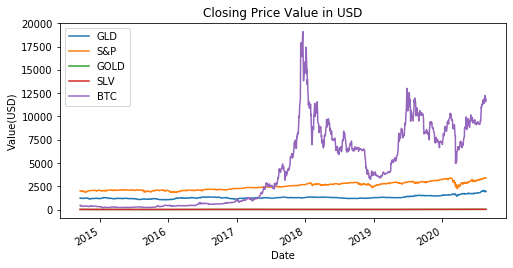

In [32]:
maindf['GLD(USD)'].plot(label='GLD',figsize=(8,4), title='Closing Price Value in USD')
maindf['S&P500(USD)'].plot(label='S&P')
maindf['GOLD(USD)'].plot(label='GOLD')
maindf['SLV(USD)'].plot(label='SLV')
maindf['BTC(USD)'].plot(label='BTC')

plt.xlabel('Date')
plt.ylabel('Value(USD)')
plt.legend();

Welp, it appears that Bitcoin has had such high values and variability that we can't even see the fluxuation of Barrick  Gold Corp (GOLD) or Silver (SLV). Let's use seaborns heatmap correlation instead.

Text(0.5, 1.05, 'Correlation of MainDF Features')

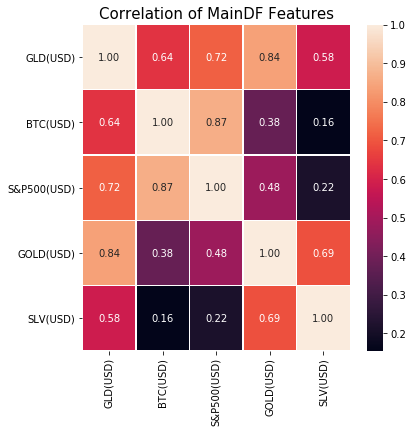

In [33]:
corr = maindf.corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True, fmt='.2f', linewidths=.30)
plt.title('Correlation of MainDF Features', y =1.05,  size=15)

That's a lot easier to read and make note of correlations. It looks like the value of gold (GLD) is significantly correlated with the value of the S&P 500 index (S&P500). In addition, there are several other noteworthy correlations, such as silvers correlation to Barrick Gold Corp and Bitcoins correlation to S&P500.